In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cvxopt

In [348]:
hw2data_raw_data = pd.read_csv('hw2data.csv',delimiter = ',',header = None)
hw2data_raw_data.columns = ['x_1', 'x_2',"y"]
np.random.seed(5525)
reo_list=list(hw2data_raw_data.index)
np.random.shuffle(reo_list)
ave_len_5 = int(len(reo_list)/5)
testing_data = hw2data_raw_data.iloc[reo_list[0:ave_len_5]]
remain_data = hw2data_raw_data.iloc[reo_list[ave_len_5:5*ave_len_5]]

reo_list_2=list(remain_data.index)
ave_len_10 = int(len(reo_list_2)/10)
index_1 = reo_list_2[0:ave_len_10]
index_2 = reo_list_2[ave_len_10:2*ave_len_10]
index_3 = reo_list_2[2*ave_len_10:3*ave_len_10]
index_4 = reo_list_2[3*ave_len_10:4*ave_len_10]
index_5 = reo_list_2[4*ave_len_10:5*ave_len_10]
index_6 = reo_list_2[5*ave_len_10:6*ave_len_10]
index_7 = reo_list_2[6*ave_len_10:7*ave_len_10]
index_8 = reo_list_2[7*ave_len_10:8*ave_len_10]
index_9 = reo_list_2[8*ave_len_10:9*ave_len_10]
index_10 = reo_list_2[9*ave_len_10:10*ave_len_10]

X_shuffled = {0:hw2data_raw_data.iloc[index_1].loc[:,["x_1","x_2"]],1:hw2data_raw_data.iloc[index_2].loc[:,["x_1","x_2"]],2:hw2data_raw_data.iloc[index_3].loc[:,["x_1","x_2"]],3:hw2data_raw_data.iloc[index_4].loc[:,["x_1","x_2"]],4:hw2data_raw_data.iloc[index_5].loc[:,["x_1","x_2"]],+
              5:hw2data_raw_data.iloc[index_6].loc[:,["x_1","x_2"]],6:hw2data_raw_data.iloc[index_7].loc[:,["x_1","x_2"]],7:hw2data_raw_data.iloc[index_8].loc[:,["x_1","x_2"]],8:hw2data_raw_data.iloc[index_9].loc[:,["x_1","x_2"]],9:hw2data_raw_data.iloc[index_10].loc[:,["x_1","x_2"]]}
y_shuffled = {0:hw2data_raw_data.iloc[index_1].loc[:,"y"],1:hw2data_raw_data.iloc[index_2].loc[:,"y"],2:hw2data_raw_data.iloc[index_3].loc[:,"y"],3:hw2data_raw_data.iloc[index_4].loc[:,"y"],4:hw2data_raw_data.iloc[index_5].loc[:,"y"],+
             5:hw2data_raw_data.iloc[index_6].loc[:,"y"],6:hw2data_raw_data.iloc[index_7].loc[:,"y"],7:hw2data_raw_data.iloc[index_8].loc[:,"y"],8:hw2data_raw_data.iloc[index_9].loc[:,"y"],9:hw2data_raw_data.iloc[index_10].loc[:,"y"]}
X_test = remain_data.loc[:,["x_1","x_2"]]
y_test = remain_data.loc[:,"y"]

In [336]:
def get_next_train_valid(X_shuffled, y_shuffled, itr):
    """
    - itr value can tell you which fold you pick up for valid and rest go to training
    - use 1 fold for validation and all other folds for training
    - in next iteration, use a different fold for validation and remaining folds for training
        
    Basically, here you will determine which fold goes for validation and which ones for training
    """
    X_valid = pd.DataFrame(X_shuffled.get(itr))
    y_valid = pd.DataFrame(y_shuffled.get(itr))
    X_train = pd.DataFrame()
    y_train = pd.DataFrame()
    for i in range(10):
        if (i != itr):
            X_train = pd.concat([X_train,X_shuffled.get(i)],axis = 0)
            y_train = pd.concat([y_train,y_shuffled.get(i)],axis = 0)
    return(X_train,y_train,X_valid,y_valid)
    #return training and validation data

In [364]:
def svmfit(X_train, y_train, bigC = 0.01):
    """
    This function should implement fitting or training your model in question. 
    """
    rnum = X_train.shape[0]
    cnum = X_train.shape[1]
    tmp_K = np.zeros((rnum, rnum))
    P = np.dot(y_train * X_train*1.0, (y_train * X_train*1.0).T)
    q = -1 * np.ones((rnum,1))
    G = np.vstack((np.eye(rnum)* -1 ,np.eye(rnum)))
    h = np.hstack((np.zeros(rnum), np.ones(rnum) * bigC))
    A = y_train.T
    b = np.array([0.0])
    
    P_cvm = cvxopt.matrix(P)
    q_cvm = cvxopt.matrix(q)
    G_cvm = cvxopt.matrix(G)
    h_cvm = cvxopt.matrix(h)
    A_cvm = cvxopt.matrix(A)
    b_cvm = cvxopt.matrix(b)
    sol=cvxopt.solvers.qp(P_cvm, q_cvm, G_cvm, h_cvm, A_cvm, b_cvm,solver='glpk',options={'glpk':{'msg_lev':'GLP_MSG_OFF'}})
    lamb = np.array(sol['x'])
    w = np.zeros(cnum,)
    for i in range(0, rnum):
        if (sol["x"][i]>=0 and sol["x"][i]<=bigC):
            w = w + np.multiply(y_t[i][0]*sol["x"][i],list(X_t[i]))
    S = (lamb > 1e-5).flatten()
    b = y_train[S] - np.dot(X_train[S], w)
    model = (w,b[0][0])
    return model
    # return model

In [291]:
def predict(X_valid, model):
    """
    Here, using the trained model, implement how to predict when you just have feature vector. 
    """
    w = model[0]
    b = model[1]
    y_predicted = np.sign(np.dot(X_valid,w) + b)
    return y_predicted
    # return 

In [385]:
"""
Main - Here goes the overall logic.
"""
# cross-validation to get train and validation data
# We will use cross validation for training and validation. In this assignment, we will not use test split separately.
#  Let us say we want k-fold with k=5 - shuffle the data and partition into k-equal partitions
#  Save paritions into dictionaries

#Loop through 5 times, each time selecting 1 fold as validation and remaining as train data sets using function get_next_train_valid 
#   train your model
#   predict target on validation and training
#   compute error i.e. RMSE or classification accuracy as per assignment question
#
#Plot or print as per question - Mean RMSE or accuracy

Training_Error_Rate_list = []
Validation_Error_Rate_list = []
#Testing_Error_Rate_list = []
model_list = []
X_test = pd.DataFrame(X_test)
y_test = pd.DataFrame(y_test)
for itr in range(10):
    X_t = get_next_train_valid(X_shuffled, y_shuffled, itr)[0]
    X_t = np.array(X_t)
    y_t = get_next_train_valid(X_shuffled, y_shuffled, itr)[1]
    y_t = np.array(y_t)
    X_v = get_next_train_valid(X_shuffled, y_shuffled, itr)[2]
    X_v = np.array(X_v)
    y_v = get_next_train_valid(X_shuffled, y_shuffled, itr)[3]
    y_v = np.array(y_v)  
    model = svmfit(X_t,y_t)
    model_list.append(model)
    y_p_t = predict(X_t,model)
    ero_t = 1-(sum(y_p_t == y_t.T[0])/y_p_t.shape[0])
    y_p_v = predict(X_v,model)
    ero_v = 1-(sum(y_p_v == y_v.T[0])/y_p_v.shape[0])
    Training_Error_Rate_list.append(ero_t)
    Validation_Error_Rate_list.append(ero_v)   
traning_mean = np.mean(Training_Error_Rate_list)
validation_mean = np.mean(Validation_Error_Rate_list)
min_ind = np.argmin(Validation_Error_Rate_list)
chosen_model = model_list[min_ind]
y_t_t = predict(X_test,chosen_model)
ero_test = 1-(sum(y_t_t == (np.array(y_test).T)[0])/y_t_t.shape[0])

     pcost       dcost       gap    pres   dres
 0: -7.2640e+02 -2.9825e+01  6e+03  8e+01  2e-14
 1: -1.7691e+01 -2.9708e+01  7e+01  7e-01  2e-14
 2: -1.1982e+01 -2.1621e+01  1e+01  2e-16  1e-15
 3: -1.3741e+01 -1.5171e+01  1e+00  2e-16  2e-15
 4: -1.4189e+01 -1.4370e+01  2e-01  8e-17  1e-15
 5: -1.4192e+01 -1.4371e+01  2e-01  3e-16  1e-15
 6: -1.4192e+01 -1.4360e+01  2e-01  2e-16  1e-15
 7: -1.4194e+01 -1.4354e+01  2e-01  1e-16  1e-15
 8: -1.4195e+01 -1.4355e+01  2e-01  4e-16  1e-15
 9: -1.4198e+01 -1.4351e+01  2e-01  1e-16  9e-16
10: -1.4197e+01 -1.4349e+01  2e-01  1e-16  8e-16
11: -1.4202e+01 -1.4345e+01  1e-01  1e-16  8e-16
12: -1.4212e+01 -1.4330e+01  1e-01  2e-16  6e-16
13: -1.4233e+01 -1.4302e+01  7e-02  7e-17  7e-16
14: -1.4252e+01 -1.4281e+01  3e-02  8e-17  1e-15
15: -1.4260e+01 -1.4272e+01  1e-02  3e-16  1e-15
16: -1.4263e+01 -1.4270e+01  7e-03  2e-16  9e-16
17: -1.4265e+01 -1.4267e+01  2e-03  4e-16  1e-15
18: -1.4266e+01 -1.4266e+01  3e-05  7e-17  2e-15
19: -1.4266e+01 -1.42

 2: -1.2060e+01 -2.1291e+01  9e+00  1e-16  1e-15
 3: -1.3913e+01 -1.4850e+01  9e-01  8e-17  2e-15
 4: -1.4328e+01 -1.4373e+01  4e-02  3e-16  2e-15
 5: -1.4352e+01 -1.4353e+01  9e-04  7e-17  1e-15
 6: -1.4353e+01 -1.4353e+01  9e-06  8e-17  1e-15
Optimal solution found.


In [386]:
ero_test

0.495

In [481]:
plot_data_x = hw2data_raw_data['x_1']
plot_data_y = hw2data_raw_data['x_2']
plot_data_c = hw2data_raw_data['y']
plot_data_c[plot_data_c == 1] = 'r'
plot_data_c[plot_data_c == -1] = 'b'

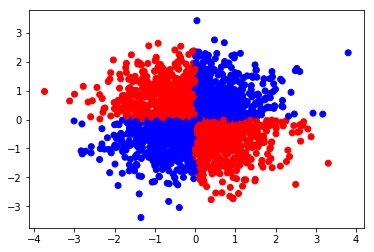

In [482]:
plt.scatter(plot_data_x, plot_data_y,color = plot_data_c)

In [390]:
C_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
C_traning_mean = []
C_validation_mean = []
C_Testing_Error = []

for i in range(8):
    Training_Error_Rate_list = []
    Validation_Error_Rate_list = []
    model_list = []
    for itr in range(10):
        X_t = get_next_train_valid(X_shuffled, y_shuffled, itr)[0]
        X_t = np.array(X_t)
        y_t = get_next_train_valid(X_shuffled, y_shuffled, itr)[1]
        y_t = np.array(y_t)
        X_v = get_next_train_valid(X_shuffled, y_shuffled, itr)[2]
        X_v = np.array(X_v)
        y_v = get_next_train_valid(X_shuffled, y_shuffled, itr)[3]
        y_v = np.array(y_v)  
        model = svmfit(X_t,y_t,C_list[i])
        model_list.append(model)
        y_p_t = predict(X_t,model)
        ero_t = 1-(sum(y_p_t == y_t.T[0])/y_p_t.shape[0])
        y_p_v = predict(X_v,model)
        ero_v = 1-(sum(y_p_v == y_v.T[0])/y_p_v.shape[0])
        Training_Error_Rate_list.append(ero_t)
        Validation_Error_Rate_list.append(ero_v)   
    traning_mean = np.mean(Training_Error_Rate_list)
    validation_mean = np.mean(Validation_Error_Rate_list)
    min_ind = np.argmin(Validation_Error_Rate_list)
    chosen_model = model_list[min_ind]
    y_t_t = predict(X_test,chosen_model)
    Testing_Error = 1-(sum(y_t_t == (np.array(y_test).T)[0])/y_t_t.shape[0])
    C_traning_mean.append(traning_mean)
    C_validation_mean.append(validation_mean)
    C_Testing_Error.append(Testing_Error)


     pcost       dcost       gap    pres   dres
 0: -7.1928e+02 -2.9869e-01  6e+03  8e+01  2e-14
 1: -7.3340e+00 -2.9868e-01  6e+01  8e-01  2e-14
 2: -2.0259e-01 -2.9731e-01  1e+00  1e-02  2e-15
 3: -1.1883e-01 -2.3155e-01  1e-01  3e-18  1e-15
 4: -1.3879e-01 -1.4609e-01  7e-03  2e-18  2e-15
 5: -1.4314e-01 -1.4400e-01  9e-04  1e-18  1e-15
 6: -1.4317e-01 -1.4323e-01  6e-05  2e-18  1e-15
 7: -1.4318e-01 -1.4321e-01  3e-05  7e-19  1e-15
 8: -1.4318e-01 -1.4321e-01  3e-05  2e-18  1e-15
 9: -1.4318e-01 -1.4321e-01  3e-05  9e-19  8e-16
10: -1.4319e-01 -1.4321e-01  2e-05  3e-18  8e-16
11: -1.4319e-01 -1.4321e-01  2e-05  2e-18  7e-16
12: -1.4319e-01 -1.4321e-01  2e-05  1e-18  6e-16
13: -1.4319e-01 -1.4320e-01  1e-05  9e-19  9e-16
14: -1.4319e-01 -1.4320e-01  1e-05  8e-19  7e-16
15: -1.4319e-01 -1.4320e-01  6e-06  9e-19  9e-16
16: -1.4319e-01 -1.4320e-01  6e-06  2e-18  9e-16
17: -1.4319e-01 -1.4320e-01  5e-06  1e-18  7e-16
18: -1.4319e-01 -1.4320e-01  2e-06  9e-19  1e-15
19: -1.4319e-01 -1.43

 6: -1.4259e-01 -1.4262e-01  4e-05  1e-18  1e-15
 7: -1.4259e-01 -1.4261e-01  2e-05  4e-18  9e-16
 8: -1.4259e-01 -1.4261e-01  2e-05  1e-18  9e-16
 9: -1.4259e-01 -1.4261e-01  2e-05  1e-18  9e-16
10: -1.4259e-01 -1.4261e-01  2e-05  1e-18  9e-16
11: -1.4259e-01 -1.4261e-01  2e-05  1e-18  9e-16
12: -1.4259e-01 -1.4261e-01  2e-05  7e-19  5e-16
13: -1.4260e-01 -1.4261e-01  1e-05  2e-18  8e-16
14: -1.4260e-01 -1.4260e-01  9e-06  3e-18  7e-16
15: -1.4260e-01 -1.4260e-01  7e-06  9e-19  7e-16
16: -1.4260e-01 -1.4260e-01  6e-06  2e-18  6e-16
17: -1.4260e-01 -1.4260e-01  3e-06  3e-18  1e-15
18: -1.4260e-01 -1.4260e-01  2e-06  2e-18  9e-16
19: -1.4260e-01 -1.4260e-01  2e-06  1e-18  7e-16
20: -1.4260e-01 -1.4260e-01  8e-07  4e-18  9e-16
21: -1.4260e-01 -1.4260e-01  5e-07  2e-18  9e-16
22: -1.4260e-01 -1.4260e-01  2e-07  4e-18  1e-15
23: -1.4260e-01 -1.4260e-01  2e-07  9e-19  1e-15
24: -1.4260e-01 -1.4260e-01  4e-08  4e-18  1e-15
Optimal solution found.
     pcost       dcost       gap    pres   dr

18: -1.4218e+00 -1.4219e+00  2e-04  1e-17  8e-16
19: -1.4218e+00 -1.4219e+00  5e-05  9e-18  1e-15
20: -1.4218e+00 -1.4219e+00  2e-05  3e-17  1e-15
21: -1.4218e+00 -1.4218e+00  2e-06  3e-17  1e-15
22: -1.4218e+00 -1.4218e+00  1e-06  4e-17  1e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -7.1981e+02 -2.9838e+00  6e+03  8e+01  2e-14
 1: -8.1940e+00 -2.9826e+00  6e+01  8e-01  2e-14
 2: -1.1430e+00 -2.8688e+00  2e+00  2e-16  2e-15
 3: -1.3387e+00 -1.4524e+00  1e-01  9e-18  2e-15
 4: -1.4038e+00 -1.4212e+00  2e-02  2e-17  1e-15
 5: -1.4051e+00 -1.4082e+00  3e-03  7e-18  1e-15
 6: -1.4052e+00 -1.4081e+00  3e-03  2e-17  1e-15
 7: -1.4052e+00 -1.4080e+00  3e-03  3e-17  1e-15
 8: -1.4053e+00 -1.4079e+00  3e-03  1e-17  7e-16
 9: -1.4053e+00 -1.4077e+00  2e-03  9e-18  6e-16
10: -1.4055e+00 -1.4073e+00  2e-03  3e-17  6e-16
11: -1.4056e+00 -1.4070e+00  1e-03  1e-17  7e-16
12: -1.4059e+00 -1.4064e+00  5e-04  2e-17  1e-15
13: -1.4060e+00 -1.4061e+00  2e-04  8e-18  1e-

17: -1.4290e+01 -1.4290e+01  1e-07  2e-16  2e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -7.2633e+02 -2.9939e+01  6e+03  8e+01  2e-14
 1: -1.7737e+01 -2.9823e+01  8e+01  8e-01  2e-14
 2: -1.1956e+01 -2.1748e+01  1e+01  2e-16  1e-15
 3: -1.3679e+01 -1.5297e+01  2e+00  8e-17  2e-15
 4: -1.4033e+01 -1.4539e+01  5e-01  8e-17  1e-15
 5: -1.4035e+01 -1.4533e+01  5e-01  1e-16  1e-15
 6: -1.4084e+01 -1.4408e+01  3e-01  7e-17  8e-16
 7: -1.4111e+01 -1.4354e+01  2e-01  8e-17  7e-16
 8: -1.4149e+01 -1.4280e+01  1e-01  1e-16  8e-16
 9: -1.4163e+01 -1.4260e+01  1e-01  2e-16  7e-16
10: -1.4181e+01 -1.4234e+01  5e-02  8e-17  9e-16
11: -1.4193e+01 -1.4219e+01  3e-02  2e-16  9e-16
12: -1.4202e+01 -1.4208e+01  6e-03  1e-16  1e-15
13: -1.4204e+01 -1.4205e+01  8e-04  3e-16  1e-15
14: -1.4205e+01 -1.4205e+01  6e-05  3e-16  2e-15
15: -1.4205e+01 -1.4205e+01  6e-06  2e-16  1e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -7.2628e+02 -2.9843

 1: -1.1383e+02 -2.8879e+02  2e+02  1e-02  2e-14
 2: -1.3194e+02 -1.5216e+02  2e+01  1e-03  4e-15
 3: -1.3616e+02 -1.4654e+02  1e+01  6e-04  3e-15
 4: -1.3667e+02 -1.4641e+02  1e+01  5e-04  3e-15
 5: -1.3777e+02 -1.4538e+02  8e+00  3e-04  3e-15
 6: -1.3930e+02 -1.4382e+02  5e+00  1e-04  3e-15
 7: -1.4009e+02 -1.4298e+02  3e+00  7e-05  3e-15
 8: -1.4094e+02 -1.4207e+02  1e+00  2e-05  3e-15
 9: -1.4125e+02 -1.4173e+02  5e-01  8e-06  3e-15
10: -1.4139e+02 -1.4158e+02  2e-01  2e-06  3e-15
11: -1.4146e+02 -1.4150e+02  4e-02  8e-08  3e-15
12: -1.4148e+02 -1.4148e+02  2e-03  4e-09  3e-15
13: -1.4148e+02 -1.4148e+02  2e-05  4e-11  3e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -7.9100e+02 -2.9936e+02  6e+03  2e+01  2e-14
 1: -1.1364e+02 -2.8776e+02  2e+02  3e-15  2e-14
 2: -1.3202e+02 -1.5306e+02  2e+01  9e-16  4e-15
 3: -1.3584e+02 -1.4687e+02  1e+01  4e-16  3e-15
 4: -1.3629e+02 -1.4661e+02  1e+01  3e-16  3e-15
 5: -1.3747e+02 -1.4532e+02  8e+00  2e-15  3e-

12: -1.4137e+03 -1.4137e+03  4e-04  1e-14  3e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.4382e+03 -3.0865e+03  7e+03  2e+00  4e-14
 1: -1.1554e+03 -2.0980e+03  9e+02  2e-14  3e-14
 2: -1.3372e+03 -1.5690e+03  2e+02  1e-14  3e-14
 3: -1.3639e+03 -1.4913e+03  1e+02  1e-14  2e-14
 4: -1.3697e+03 -1.4779e+03  1e+02  2e-15  3e-14
 5: -1.3796e+03 -1.4582e+03  8e+01  3e-14  3e-14
 6: -1.3968e+03 -1.4286e+03  3e+01  2e-14  3e-14
 7: -1.4048e+03 -1.4099e+03  5e+00  3e-14  3e-14
 8: -1.4060e+03 -1.4061e+03  1e-01  7e-15  3e-14
 9: -1.4060e+03 -1.4060e+03  1e-03  2e-15  3e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.4390e+03 -3.0548e+03  7e+03  2e+00  4e-14
 1: -1.1620e+03 -2.0749e+03  9e+02  2e-15  3e-14
 2: -1.3520e+03 -1.5550e+03  2e+02  5e-15  2e-14
 3: -1.3773e+03 -1.4933e+03  1e+02  4e-14  2e-14
 4: -1.3806e+03 -1.4846e+03  1e+02  5e-15  2e-14
 5: -1.3888e+03 -1.4688e+03  8e+01  3e-14  2e-14
 6: -1.3904e+03 -1.4657

 2: -1.3444e+04 -1.4356e+04  9e+02  9e-14  2e-13
 3: -1.3672e+04 -1.4268e+04  6e+02  1e-13  2e-13
 4: -1.3685e+04 -1.4270e+04  6e+02  6e-14  3e-13
 5: -1.3715e+04 -1.4285e+04  6e+02  2e-13  3e-13
 6: -1.3795e+04 -1.4290e+04  5e+02  7e-14  2e-13
 7: -1.3886e+04 -1.4249e+04  4e+02  3e-14  2e-13
 8: -1.3992e+04 -1.4165e+04  2e+02  6e-14  3e-13
 9: -1.4056e+04 -1.4077e+04  2e+01  3e-14  3e-13
10: -1.4060e+04 -1.4060e+04  3e-01  6e-14  3e-13
11: -1.4060e+04 -1.4060e+04  3e-03  1e-13  3e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -7.9145e+03 -3.8413e+04  3e+04  6e-14  2e-13
 1: -1.0561e+04 -1.4621e+04  4e+03  3e-13  2e-13
 2: -1.3587e+04 -1.4415e+04  8e+02  1e-13  2e-13
 3: -1.3785e+04 -1.4334e+04  5e+02  3e-13  2e-13
 4: -1.3800e+04 -1.4339e+04  5e+02  2e-13  2e-13
 5: -1.3831e+04 -1.4347e+04  5e+02  3e-14  2e-13
 6: -1.3859e+04 -1.4359e+04  5e+02  1e-13  2e-13
 7: -1.3921e+04 -1.4367e+04  4e+02  1e-13  2e-13
 8: -1.3962e+04 -1.4364e+04  4e+02  3e-14  2e-

 2: -1.3544e+05 -1.5123e+05  2e+04  5e-12  2e-12
 3: -1.3775e+05 -1.4738e+05  1e+04  2e-12  2e-12
 4: -1.3848e+05 -1.4645e+05  8e+03  2e-12  2e-12
 5: -1.3896e+05 -1.4599e+05  7e+03  6e-12  3e-12
 6: -1.4000e+05 -1.4463e+05  5e+03  2e-13  2e-12
 7: -1.4086e+05 -1.4354e+05  3e+03  3e-12  3e-12
 8: -1.4145e+05 -1.4276e+05  1e+03  1e-12  3e-12
 9: -1.4177e+05 -1.4237e+05  6e+02  1e-12  3e-12
10: -1.4204e+05 -1.4209e+05  5e+01  7e-13  3e-12
11: -1.4206e+05 -1.4206e+05  4e+00  7e-13  3e-12
12: -1.4206e+05 -1.4206e+05  6e-01  3e-12  3e-12
13: -1.4206e+05 -1.4206e+05  6e-03  2e-12  3e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -7.2680e+04 -9.8277e+05  9e+05  4e-12  2e-12
 1: -8.3049e+04 -1.5243e+05  7e+04  2e-13  2e-12
 2: -1.3679e+05 -1.5033e+05  1e+04  9e-13  3e-12
 3: -1.3896e+05 -1.4686e+05  8e+03  2e-13  2e-12
 4: -1.3979e+05 -1.4569e+05  6e+03  1e-12  3e-12
 5: -1.4076e+05 -1.4449e+05  4e+03  2e-12  3e-12
 6: -1.4146e+05 -1.4353e+05  2e+03  9e-13  3e-

 3: -1.3337e+06 -1.4331e+06  1e+05  2e-11  2e-11
 4: -1.3413e+06 -1.4370e+06  1e+05  1e-11  2e-11
 5: -1.3523e+06 -1.4386e+06  9e+04  5e-12  2e-11
 6: -1.3631e+06 -1.4424e+06  8e+04  2e-16  2e-11
 7: -1.3751e+06 -1.4398e+06  6e+04  3e-11  2e-11
 8: -1.3844e+06 -1.4370e+06  5e+04  2e-12  2e-11
 9: -1.3911e+06 -1.4356e+06  4e+04  5e-12  2e-11
10: -1.4057e+06 -1.4308e+06  3e+04  4e-11  2e-11
11: -1.4119e+06 -1.4276e+06  2e+04  7e-12  2e-11
12: -1.4166e+06 -1.4249e+06  8e+03  2e-16  3e-11
13: -1.4192e+06 -1.4221e+06  3e+03  7e-12  2e-11
14: -1.4205e+06 -1.4207e+06  2e+02  3e-11  3e-11
15: -1.4206e+06 -1.4206e+06  3e+01  2e-11  3e-11
16: -1.4206e+06 -1.4206e+06  9e-01  2e-11  3e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -7.2015e+05 -7.1738e+07  7e+07  3e-11  2e-11
 1: -7.3449e+05 -2.1438e+06  1e+06  2e-12  2e-11
 2: -1.3009e+06 -1.4510e+06  2e+05  3e-11  3e-11
 3: -1.3548e+06 -1.4419e+06  9e+04  3e-11  2e-11
 4: -1.3668e+06 -1.4434e+06  8e+04  1e-11  2e-

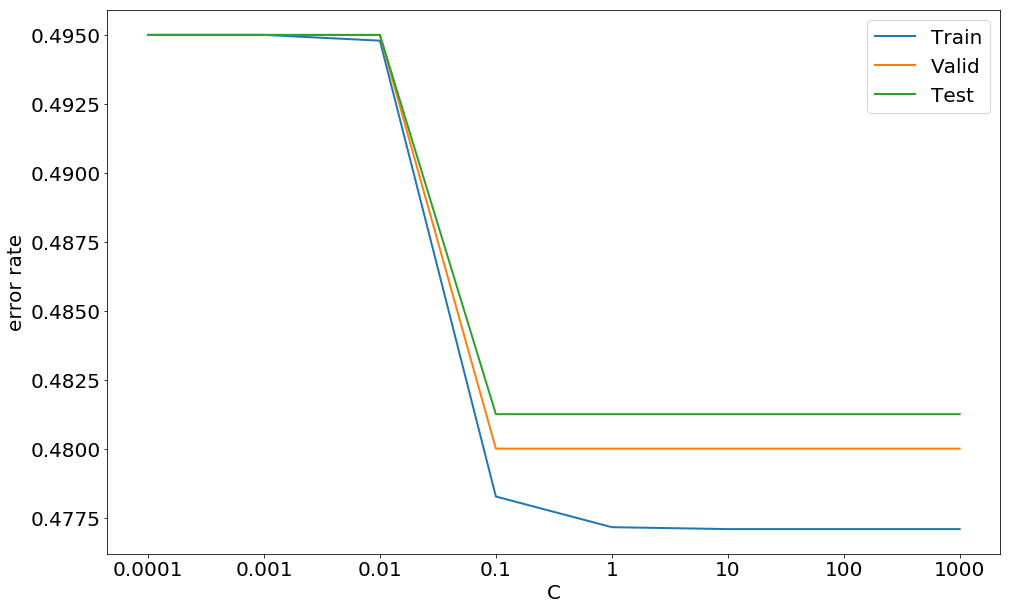

In [392]:
plt.figure(figsize=(16,10))
plt.plot(np.log(C_list), C_traning_mean, marker='', linewidth = 2, label = 'Train')
plt.plot(np.log(C_list), C_validation_mean, marker='', linewidth = 2, label = 'Valid')
plt.plot(np.log(C_list), C_Testing_Error, marker='', linewidth = 2, label = 'Test')
plt.legend(fontsize=20)
plt.xlabel('C', fontsize=20)
plt.ylabel('error rate', fontsize=20)
plt.xticks(np.log(C_list), ['0.0001', '0.001', '0.01', '0.1','1', '10', '100', '1000' ], fontsize=20)
plt.yticks(fontsize=20)
plt.show()